country — наименование страны;
date — дата наблюдения;
total_vaccinations — общее число введённых вакцин в стране на указанный день;
people_vaccinated — общее число привитых первым компонентом в стране на указанный день;
people_vaccinated_per_hundred — процент привитых первым компонентом в стране на указанный день (рассчитывается как );
people_fully_vaccinated — общее число привитых вторым компонентом в стране на указанный день (первый компонент уже был введён им ранее);
people_fully_vaccinated_per_hundred — процент привитых вторым компонентом в стране на указанный день (рассчитывается как );
daily_vaccination — ежедневная вакцинация (число вакцинированных в указанный день);
vaccines — комбинации вакцин, используемые в стране.

 date — дата наблюдения;
 province/state — наименование провинции/штата;
 country — наименование страны;
 confirmed — общее число зафиксированных случаев на указанный день;
 deaths — общее число зафиксированных смертей на указанный день;
 recovered — общее число выздоровлений на указанный день.

<Axes: title={'center': 'Распределение ежедневной заболеваемости'}, xlabel='country'>

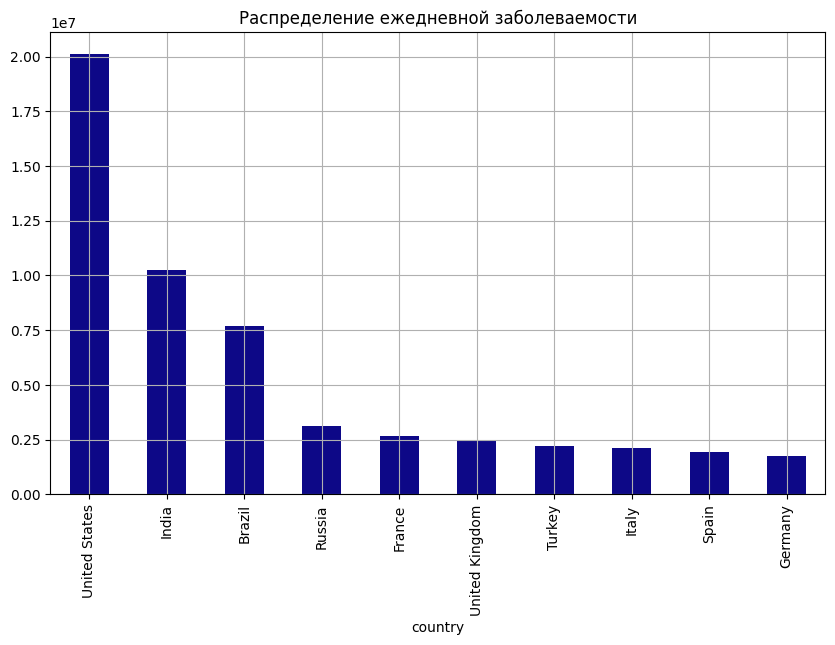

In [ ]:
import pandas as pd
covid_url = 'https://raw.githubusercontent.com/Ar1sha/sf/master/Pandas/covid_data.csv'
vacc_url = 'https://raw.githubusercontent.com/Ar1sha/sf/master/Pandas/country_vaccinations.csv'
df = pd.read_csv(covid_url, sep=',')
vaccinations_data = pd.read_csv(vacc_url, sep=',')
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']
]
df = df.groupby(
    ['date', 'country'], 
    as_index=False
)[['confirmed', 'deaths', 'recovered']].sum()
df['active'] = df['confirmed'] - df['deaths'] - df['recovered']
df = df.sort_values(by=['country', 'date'])
df['daily_confirmed'] = df.groupby('country')['confirmed'].diff()
df['daily_deaths'] = df.groupby('country')['deaths'].diff()
df['daily_recovered'] = df.groupby('country')['recovered'].diff()
df['date'] = pd.to_datetime(df['date'])
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])
mask = df['date'].max()
mask2 = df['date'].min()
vac_mask = vaccinations_data[(vaccinations_data['date']<mask) & (vaccinations_data['date']>mask2)]
covid_df = pd.merge(
    df,
    vac_mask,
    on=['country','date'],
    how='left'
)
covid_df['death_rate']= covid_df['deaths']/covid_df['confirmed']*100
covid_df['recovered_rate']=covid_df['recovered']/covid_df['confirmed']*100
grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')

# cases = grouped_cases.plot(
#     kind='line',
#     figsize=(12, 4),
#     title='Ежедневная заболеваемость во времени',
#     grid = True,
#     lw=3
# )
grouped_country = covid_df.groupby(['country'])['confirmed'].last()
grouped_country = grouped_country.nlargest(10)
histogram = grouped_country.plot(
    kind='bar',
    figsize=(10, 6),
    title='Распределение ежедневной заболеваемости',
    grid = True,
    colormap = 'plasma',
 )
display(histogram)
